<a href="https://colab.research.google.com/github/argennof/PDI_2022/blob/main/PDI_TP_Romero_MV_Moran_G_Fonnegra_D_vf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Procesamiento de Imágenes - Diplodatos 2022

### Trabajo Práctico

In [1]:
integrantes = ["Gisela Moran", "Maria Virginia Romero Messein", "Diana Fonnegra"]
print('Integrantes: \n ',*integrantes, sep="\n")


Integrantes: 
 
Gisela Moran
Maria Virginia Romero Messein
Diana Fonnegra


# Ejercicio 1.1:
La propuesta para esta actividad consiste en manipular independientemente la luminancia y la saturación de una imagen.Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) o de IQ (para cambiar la saturación).

Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una nueva imagen.

## Rta//:

- Primero importaremos las librerias necesarias:

In [2]:
import imageio as img
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

A su vez tenemos en cuenta que:

Cargamos en memoria la imagen y le damos una previsualizacion:

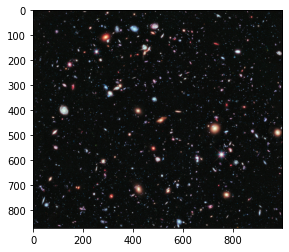

In [3]:
img_1 = img.imread('imageio:hubble_deep_field.png')
plt.imshow(img_1)

Consultamos algunas caracteristicas basicas:

In [4]:
print(f'Dimensiones de la imagen (filas,columnas,canales): {img_1.shape}')

Dimensiones de la imagen (filas,columnas,canales): (872, 1000, 3)


- Con el proposito de transformar la imagen inicial del espacio RGB al espacio YIQ se define una matriz `M_YIQ ` y una funcion que permite esta transformacion `apply_matrix `. 

In [5]:
def apply_matrix(img, M, norm = True):
    """
    Convierte una imagen RGB sin normalizar a una normalizada y luego a un espacio de color
    :parametro img -> p.e. una imagen en RGB
    :retorna: una imagen en el espacio de color determinado por M
    : M -> Matriz de la tranformacion lineal (p.e. de RGB a YIQ)
    """
    if norm:
        img = img/255 #Normalización de la imagen

    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)



In [6]:
# Matriz que transforma al espacio YIQ 
M_YIQ = np.array([[0.299, 0.587, 0.114],
                  [0.596, -0.274, -0.322],
                  [0.211, -0.523, 0.312]])

# para seleccionar canal rojo:
M_R = np.array([[1, 0, 0], 
              [0, 0, 0], 
              [0, 0, 0]])

# Matriz que transforma al espacio RGB 
M_RGB = np.array([[1, 0.956, 0.621],
                  [1, -0.272, -0.647],
                  [1, -1.106, 1.703]])


In [7]:
# ejemplo de extraccion del canal rojo
img_R = apply_matrix(img_1, M_R)

In [8]:
# Transformando la matriz a un nuevo espacio
img_YIQ = apply_matrix(img_1, M_YIQ)

Text(0.5, 1.0, 'Canal Rojo')

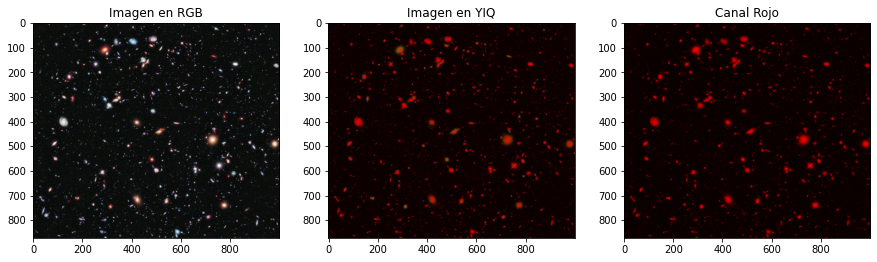

In [9]:
# RGB, YIQ, Rojo:
fig, axes = plt.subplots(1, 3, figsize=(15,9))
axes[0].imshow(img_1)
axes[0].set_title('Imagen en RGB')
axes[1].imshow(np.clip(img_YIQ, 0, 1))
axes[1].set_title('Imagen en YIQ')
axes[2].imshow(img_R)
axes[2].set_title('Canal Rojo')

In [10]:
# control sobre los valores:
print(img_1[300, 150])
print(img_YIQ[300, 150])

[26 21 18]
[0.08687451 0.01547451 0.00046667]


Se extraen cada uno de los canales de la imagen transformada al espacio de color `YIQ` y se consultan sus respectivos minimos y maximos. Verificamos que:  
- $Y'<=1$
- $-0.5957 < I'< 0.5957$
- $-0.5226 < Q'< 0.5226$

In [11]:
# Separacion de canales - Almacenandolos en variables independientes:
Y = img_YIQ[:,:,0]
I = img_YIQ[:,:,1]
Q = img_YIQ[:,:,2]

In [12]:
#controlamos valores iniciales
print(f'Min y Max Y: {np.min(Y),np.max(Y)}')
print(f'Min y Max I: {np.min(I),np.max(I)}')
print(f'Min y Max Q: {np.min(Q),np.max(Q)}')
print(f'Min y Max Original: {np.min(img_1),np.max(img_1)}')

Min y Max Y: (0.0, 0.9999999999999999)
Min y Max I: (-0.5527764705882353, 0.42736470588235287)
Min y Max Q: (-0.1766509803921569, 0.23793333333333333)
Min y Max Original: (0, 255)


In [13]:
# Multiplicamos los canales YIQ por los coeficientes alfa y beta:
alfa = 0.5
beta = 0.8

y_p = Y*alfa
i_p = I*beta
q_p = Q*beta

In [14]:
# Controlamos los rangos resultantes:
print(f"Min y Max Y': {np.min(y_p),np.max(y_p)}")
print(f"Min y Max I': {np.min(i_p),np.max(i_p)}")
print(f"Min y Max Q': {np.min(q_p),np.max(q_p)}")


Min y Max Y': (0.0, 0.49999999999999994)
Min y Max I': (-0.4422211764705883, 0.34189176470588234)
Min y Max Q': (-0.14132078431372552, 0.19034666666666666)


In [15]:
# Apilando las anteriores para regresar al espacio RGB:
yiq_p = np.stack([y_p,i_p,q_p], axis=2)

# Retornando a RGB - Transformada:
img_RGBT = apply_matrix(yiq_p, M_RGB, False)

In [16]:
print(f"Min y Max para img_RGBT: {np.min(img_RGBT),np.max(img_RGBT)}")

Min y Max para img_RGBT: (-0.1871336031372549, 0.643715871372549)


In [17]:
# Truncamos los valores RGB al rango [0,1] (utilizando np.clip):
img_RGBT = np.clip(img_RGBT, 0, 1)
print(f"Min y Max para img_RGBT: {np.min(img_RGBT),np.max(img_RGBT)}")

Min y Max para img_RGBT: (0.0, 0.643715871372549)


Text(0.5, 1.0, 'Imagen RGB Transformada')

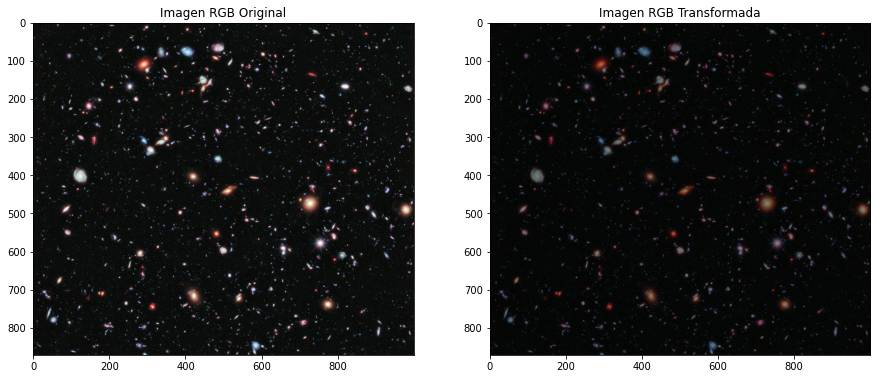

In [18]:
# Original vs Transformada
fig, axes = plt.subplots(1, 2, figsize=(15,9))
axes[0].imshow(img_1)
axes[0].set_title('Imagen RGB Original')
axes[1].imshow(img_RGBT)
axes[1].set_title('Imagen RGB Transformada')


(array([291., 480., 694., 720., 466., 197.,  77.,  32.,  13.,   3.,   0.,
          5.,   4.,   0.,   2.,   2.,   2.,   0.,   0.,   1.,   1.,   1.,
          0.,   1.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.00887406, 0.01774812, 0.02662218, 0.03549624,
        0.0443703 , 0.05324436, 0.06211842, 0.07099248, 0.07986654,
        0.0887406 , 0.09761466, 0.10648872, 0.11536278, 0.12423684,
        0.1331109 , 0.14198496, 0.15085903, 0.15973309, 0.16860715,
        0.17748121, 0.18635527, 0.19522933, 0.20410339, 0.21297745,
        0.22185151, 0.23072557, 0.23959963, 0.24847369, 0.25734775,
        0.26622181, 0.27509587, 0.28396993, 0.29284399, 0.30171805,
        0.31059211, 0.31946617, 0.32834023, 0.33721429, 0.34608835,
        0.35496241, 0.36383647, 0.37271053, 0.38158459, 0.39045865,
        0.39933271, 0.40820677, 0.41708083, 0.

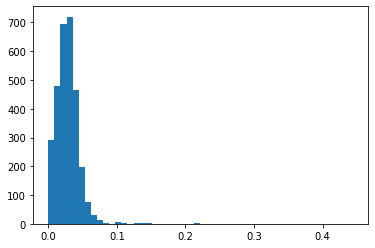

In [19]:
plt.hist(img_RGBT[0].ravel(),bins=50)

# Ejercicio 1.2
Desarrollar un aplicativo o notebook que pueda abrir una imagen, manipule su histograma de luminancias, y luego ver la imagen procesada. Se debe poder elegir filtro raíz, cuadrado, o lineal a trozos.
Los controles para elegir los filtros los organizan como les resulte más cómodo.

# Rta//: 

- Construcción de la función que considera a los filtros `Cuadrado, Raíz, Lineal a trozos`:

In [20]:
import cv2
from skimage import io
from google.colab import widgets
from google.colab.patches import cv2_imshow
import numpy as np


def aplicarFiltro(urlImagen, tipoFiltro):
    '''
    Modifica la imagen 
    parametros: imagen y tipo de filtro 
    '''
    
    image = io.imread(urlImagen)/255.

    if tipoFiltro == 'Cuadrado':
        processed_image = image * image
    
    elif tipoFiltro == 'Raíz':
        processed_image = np.sqrt(image)
    
    elif tipoFiltro == 'Lineal_Trozos':
        image = io.imread(urlImagen)
        processed_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        mean_val = np.mean(processed_image)
        processed_image[processed_image<mean_val] = 0
        processed_image[processed_image>=mean_val] = 1
        image = image/255
    
    
    return image, processed_image,tipoFiltro

- Una vez definidas las anteriores hacemos uso de ellas por medio del formulario.
- Se crean tambien los histogramas para las imagenes con y sin filtro.

,
,
,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Antes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Después


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

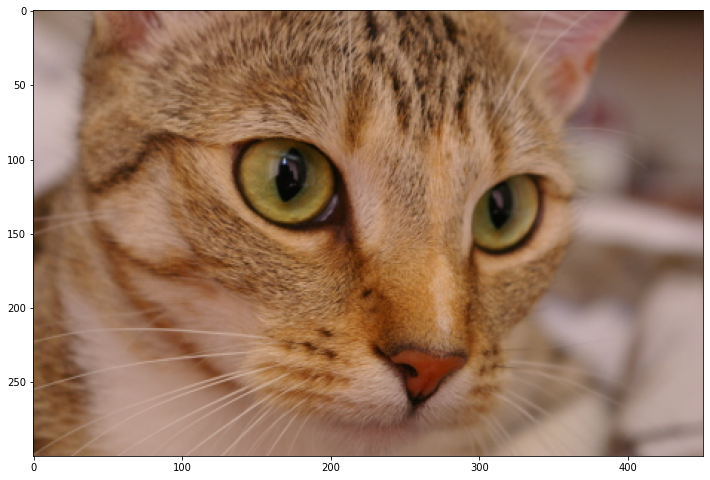

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

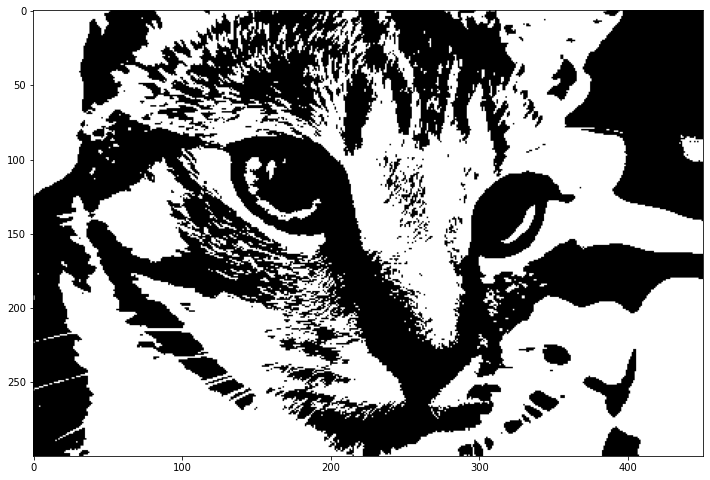

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

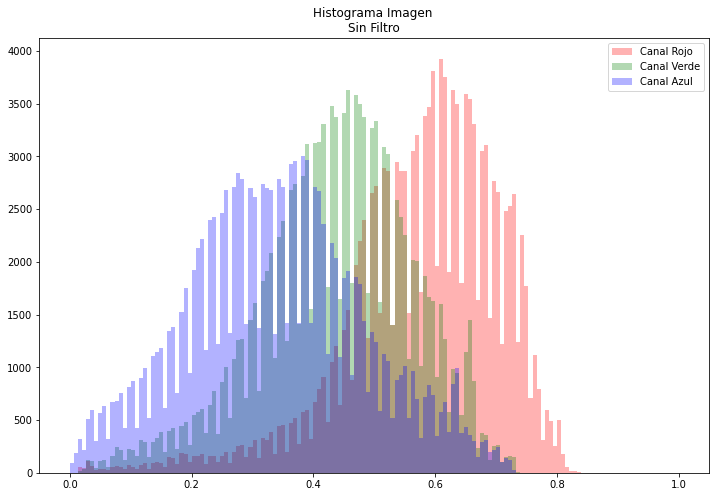

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

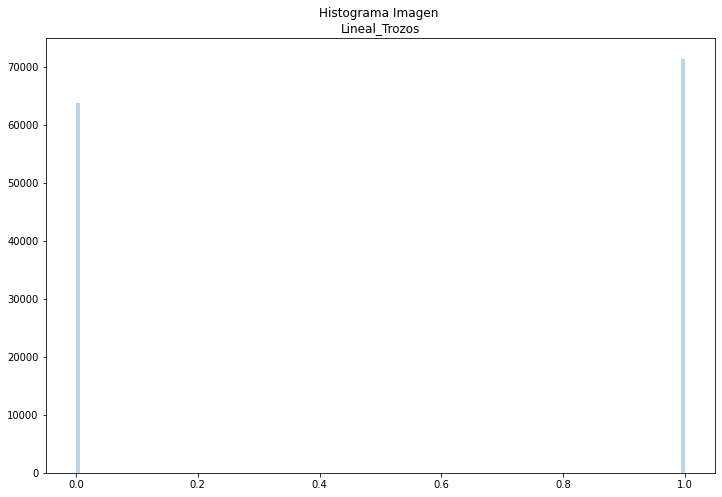

<IPython.core.display.Javascript object>

In [21]:

#@title Aplicar Filtro con grillas { run: "auto" }

#@markdown # Ingrese la url de la imagen que desea filtrar
img_url = 'imageio:chelsea.png' #@param ['imageio:astronaut.png','imageio:hubble_deep_field.png','imageio:wikkie.png','imageio:chelsea.png','https://tinyurl.com/yyr8et9y','https://tinyurl.com/yy7jf3zq']{allow-input: true}

#@markdown # Elige el tipo de filtro
tipoFiltro = "Lineal_Trozos"  #@param ['Raíz', 'Cuadrado', 'Lineal_Trozos']

antes, despues,tipoFiltro = aplicarFiltro(img_url,tipoFiltro)

#creamos la grilla
grid = widgets.Grid(3, 2)

#ahora rellenamos las celdas
with grid.output_to(0, 0):
    print("Antes")
  
with grid.output_to(0, 1):
    print("Después")

with grid.output_to(1, 0):
    plt.figure(figsize=(12,12))
    plt.imshow(antes)
  
with grid.output_to(1, 1):
    plt.figure(figsize=(12,12))
    plt.imshow(despues,'gray')

with grid.output_to(2, 0):
    colors = ['red','green','blue']
    datos_a = antes.reshape(-1,3)
    plt.figure(figsize=(12,8))
    plt.hist(datos_a[:,0], histtype='stepfilled',bins=150, alpha= 0.3,\
             label= 'Canal Rojo',color=colors[0],range=(0, 1))
    plt.hist(datos_a[:,1], histtype='stepfilled',bins=150, alpha= 0.3,\
             label= 'Canal Verde',color=colors[1],range=(0, 1))
    plt.hist(datos_a[:,2], histtype='stepfilled',bins=150, alpha= 0.3,\
             label= 'Canal Azul',color=colors[2],range=(0, 1))        
    plt.legend(loc='upper right')
    plt.title('Histograma Imagen \nSin Filtro')

  
with grid.output_to(2, 1):
    if tipoFiltro == 'Lineal_Trozos':
        plt.figure(figsize=(12,8))
        plt.hist(despues.ravel(), histtype='stepfilled',bins=150, alpha= 0.3,\
             label= 'Imagen Binarizada',range=(0, 1))
        plt.title(f'Histograma Imagen \n{tipoFiltro}')
    else:
        colors = ['red','green','blue']
        ## print(despues.shape) # (168*300,3)
        datos_a = despues.reshape(-1,3) # Nuevaforma
        plt.figure(figsize=(12,8))
        plt.hist(datos_a[:,0], histtype='stepfilled',bins=150, alpha= 0.3,\
                label= 'Canal Rojo',color=colors[0],range=(0, 1))
        plt.hist(datos_a[:,1], histtype='stepfilled',bins=150, alpha= 0.3,\
                label= 'Canal Verde',color=colors[1],range=(0, 1))
        plt.hist(datos_a[:,2], histtype='stepfilled',bins=150, alpha= 0.3,\
                label= 'Canal Azul',color=colors[2],range=(0, 1))        
        plt.legend(loc='upper right')
        plt.title(f'Histograma Imagen \n{tipoFiltro}')    
 


# Ejercicio 2.1
Implementar un aplicativo o notebook que levante una imagen en nivel de gris (o que la convierta a YIQ y retenga solo el Y) y aplique el filtrado por convolución aquí visto:
1. Pasabajos: Plano, Bartlett 3x3, Gaussiano 5x5.
2. Detectores de bordes: Laplaciano v4, Sobel 4 orientaciones.
3. Pasabanda.

Respecto del “cierre” de la imagen cerca de los bordes, implementar la técnica no ma- temáticamente perfecta de “repetir” artificialmente filas o columnas cuando estas hagan falta. Por ejemplo, si el kernel es 3x3 y estoy en la primera columna, y no hay ninguna columna a la izquierda, entonces repito la primera columna como si estuviese en la imagen original.

- Construcción de los filtros (funciones):


In [22]:

from scipy import signal
import scipy.ndimage.filters

def gaussian_kernel(ksize, std=1):
    kernel = np.outer(signal.gaussian(ksize, std), signal.gaussian(ksize, std))
    kernel = kernel / np.sum(kernel)
    return kernel


def laplace(ksize):
    kernel = np.zeros((ksize,ksize))
    kernel[ksize//2,ksize//2] = -1 # pixel central
    flapla = scipy.ndimage.filters.laplace(kernel)
    return flapla

def Fpasabanda(kg,kch):
    fm = np.pad(gaussian_kernel(kch),1) # filtro pequenno

    fM = (gaussian_kernel(kg),1) # filtro grande
    pasabanda = fm - fM
    return pasabanda

def sobel(ksize,orient='',px=1):
    kernel = np.zeros((ksize,ksize))
    if orient == 'Norte':
        kernel[ksize//2,ksize//2] = px*(-1) # pixel central
        # print(kernel)
        sobel = scipy.ndimage.sobel(kernel, axis=0)
        
    elif orient == 'Sur':
        kernel[ksize//2,ksize//2] = px # pixel central
        # print(kernel)
        sobel = scipy.ndimage.sobel(kernel, axis=0)

    elif orient == 'Oeste':
        kernel[ksize//2,ksize//2] = px  # pixel central
        # print(kernel)
        sobel = scipy.ndimage.sobel(kernel, axis=1)        
    
    elif orient == 'Este':
        kernel[ksize//2,ksize//2] = px *(-1)# pixel central
        # print(kernel)
        sobel = scipy.ndimage.sobel(kernel, axis=1)        
    
    return sobel


def crearfiltro(ksize,tipoFiltro, px, orient):

    if tipoFiltro == 'Plano':
        filtro = np.full((ksize,ksize),1/ksize**2) # Filtro de media
        # print(f'Plano:\n{filtro},\n kernel_size: {ksize}\n')
        # print(np.sum(filtro))
    elif tipoFiltro == 'Bartlett':
        filtro = np.outer(np.bartlett(ksize),np.bartlett(ksize))
    elif tipoFiltro == 'Gausiano':
        filtro = gaussian_kernel(ksize)
    
    elif tipoFiltro == 'Laplacev4':
        filtro = laplace(ksize)
    
    elif tipoFiltro == 'Sobel':
        filtro = sobel(ksize,orient,px=px)

    elif tipoFiltro == 'Pasabanda':
         filtro = Fpasabanda(5, 3)
    #      print(filtro)
        
    return filtro



In [23]:
# Algunas partes se tomaron de: https://claudiovz.github.io/scipy-lecture-notes-ES/advanced/image_processing/index.html

# Ventanas a trabajar:
# #axis=0, px=1 - sobel_sur
# [[ 1.,  2.,  1.],
# [ 0.,  0.,  0.],
# [-1., -2., -1.]]

# #axis=0, px=-1 - sobel_norte
# [[-1., -2., -1.],
# [ 0.,  0.,  0.],
# [ 1.,  2.,  1.]]

# # axis=-1, px=1 - sobel_oeste
# [[ 1.,  0., -1.],
# [ 2.,  0., -2.],
# [ 1.,  0., -1.]

# # axis=1, px= -1 - sobel_este
# [[-1.,  0.,  1.],
# [-2.,  0.,  2.],
# [-1.,  0.,  1.]]

- Función que define a la convolucion de la imagen:

In [24]:
def convol_img(img, tipoFiltro, ksize, px, orient):
    '''
    Modifica la imagen 
    parametros: imagen y tipo de filtro 
    '''

    pad = ksize//2
    # # Amplitud de la imagen:
    img = np.pad(img, pad, mode='edge')
    
    kernel = crearfiltro(ksize, tipoFiltro, px, orient)

    img_operada = np.zeros(img.shape) # imagen salida
    filas = img_operada.shape[0]
    cols = img_operada.shape[1]

    for i in range(pad, filas-pad):
        for j in range(pad, cols-pad): 
            # print(i,j) #valor central
            # Dado un valor central establezco el trozo de img que voy a operar con el kernell:
            sub_img = img[i-pad:i+pad+1,j-pad:j+pad+1] #pad+1 por el range!
            img_operada[i,j] = np.sum(sub_img*kernel)
    
    img_operada = img_operada[pad:-pad,pad:-pad]   
    return img_operada

# Funcion que carga a la imagen como una banda en escala de grises:
def load_Grayimg(urlImagen,tipoFiltro,ksize,px,orient=''):    
    image = io.imread(urlImagen)
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    processed_image = convol_img(gray_image, tipoFiltro, ksize, px, orient)
    return gray_image, processed_image


### A continuación se muestran en el formulario, las opciones que ejecutan a las funciones anteriores:

- Se debe tenere en cuenta que los filtros de tipo `Pasabajos: Plano, Bartlett, Gaussiano` el usuario puede decidir el tamaño de kernel. Mientras que para `Detectores de borde: Laplace4V, Sobel (todas las orientaciones)`, el kernel sera de 3x3. Finalmente en el caso de `Pasabanda` la ventana se encuentra predefinida a una de 5x5.

,
,
,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Antes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Después


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

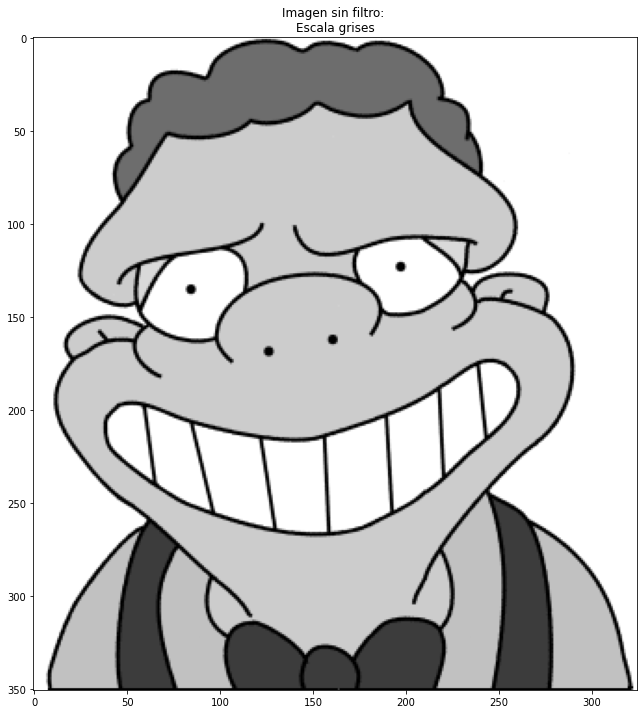

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

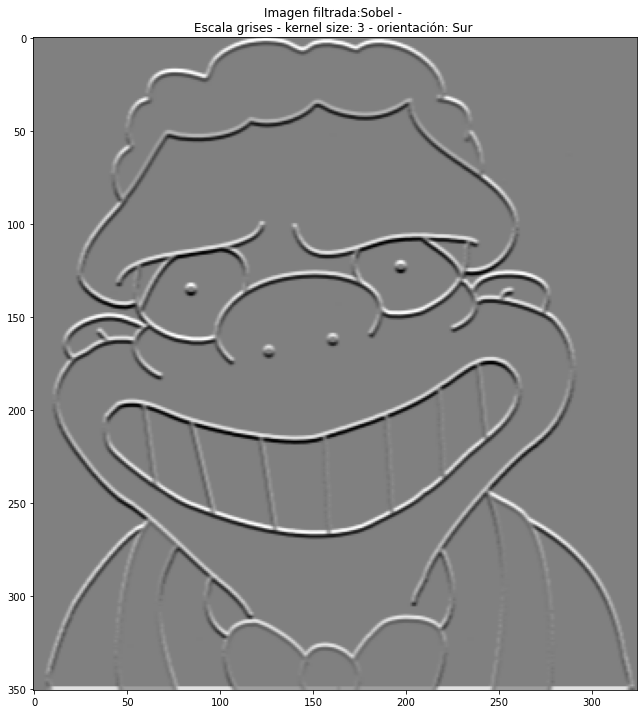

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

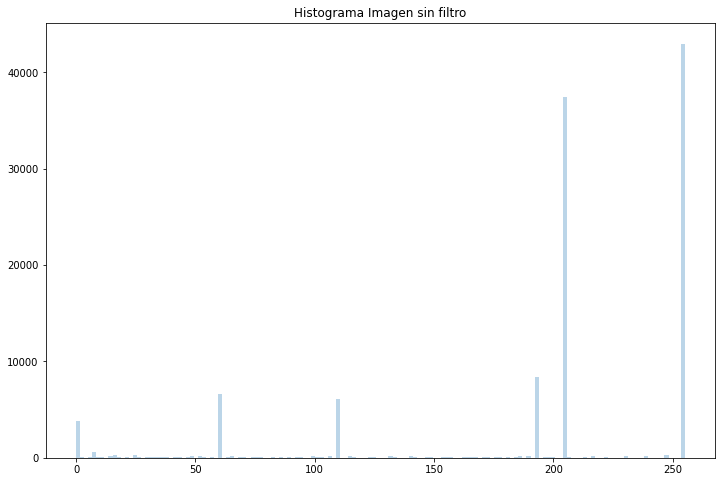

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

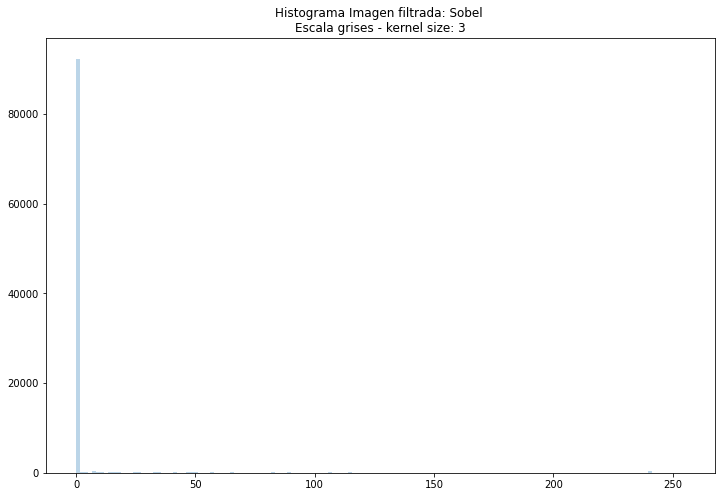

<IPython.core.display.Javascript object>

In [25]:

#@title Aplicar Filtro con grillas { run: "auto" }

#@markdown # Ingrese la url de la imagen que desea filtrar
img_url = 'https://tinyurl.com/yy7jf3zq' #@param ['imageio:astronaut.png','imageio:hubble_deep_field.png','imageio:wikkie.png','imageio:chelsea.png','https://tinyurl.com/yyr8et9y','https://tinyurl.com/yy7jf3zq']{allow-input: true}

#@markdown # Elige el tipo de filtro:
tipoFiltro = 'Sobel'  #@param['Plano', 'Bartlett', 'Gausiano', 'Laplacev4','Sobel','Pasabanda'] 


#@markdown # Elige la dimensión del kernel:
ksize = 3  #@param[3, 5] {allow-input: true}

#@markdown # Si es filtro sobel - seleccione su orientación y px > 0:
orient = 'Sur'  #@param['Norte','Sur','Oeste','Este'] 
px =  "1"  #@param[1] {allow-input: true}


# Ejecutando a la funcion:
antes, despues = load_Grayimg(img_url, tipoFiltro, int(ksize), int(px), orient)

#creamos la grilla
grid = widgets.Grid(3, 2)

#ahora rellenamos las celdas
with grid.output_to(0, 0):
    print("Antes")
  
with grid.output_to(0, 1):
    print("Después")

with grid.output_to(1, 0):
    plt.figure(figsize=(12,12))
    plt.imshow(antes,'gray')
    plt.title(f'Imagen sin filtro: \nEscala grises')
  
with grid.output_to(1, 1):
    if tipoFiltro=='Sobel':
        texto = f'Imagen filtrada:{tipoFiltro} - \nEscala grises - kernel size: {ksize} - orientación: {orient} '
    else:
        texto = f'Imagen filtrada:{tipoFiltro} - \nEscala grises - kernel size: {ksize} '
    plt.figure(figsize=(12,12))
    plt.imshow(despues,'gray')
    plt.title(texto)

with grid.output_to(2, 0):
    plt.figure(figsize=(12,8))
    plt.hist(antes.ravel(), histtype='stepfilled',bins=150, alpha= 0.3,\
             label= 'Imagen Filtrada',range=(0, 255))
    plt.title(f'Histograma Imagen sin filtro')
  
with grid.output_to(2, 1):
    plt.figure(figsize=(12,8))
    plt.hist(despues.ravel(), histtype='stepfilled',bins=150, alpha= 0.3,\
             label= 'Imagen Filtrada',range=(0, 255))
    plt.title(f'Histograma Imagen filtrada: {tipoFiltro} \nEscala grises - kernel size: {ksize}')
    


# Ejercicio 2.2
Desarrollar un aplicativo o notebook que implemente los conceptos de morfología en niveles de gris aquí descriptos, con un elemento estructurante 3x3. El mismo incluirá las siguientes funciones:
- Erosión (tomar el mínimo valor de luminancia de la vecindad).
- Dilatación (máximo)
- Apertura, Cierre, Borde morfológico
- Mediana
- Top-hat

Incluir la capacidad de copiar la componente de la imagen procesada en la componente original, para poder aplicar dos o más filtrados en secuencia.

In [26]:
# Partes tomadas de:
# https://www.geeksforgeeks.org/erosion-dilation-images-using-opencv-python/
# https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

In [27]:

def morphological_filters(image, filter, ksize, iterations):
    kernel = np.ones((ksize, ksize), np.uint8)
    lista = []
    # print(filter)
    if filter=='Erosion':
        procesada = cv2.erode(image, kernel, iterations = iterations)
      
    if filter=='Dilatacion':     
        procesada = cv2.dilate(image, kernel, iterations = iterations)

    if filter=='Apertura':
        image = cv2.erode(image, kernel, iterations = iterations)
        procesada = cv2.dilate(image, kernel, iterations = iterations)
    if filter=='Cierre':
        image = cv2.dilate(image, kernel, iterations = iterations)
        procesada = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel) 
    if filter=='Borde_morfologico':
        procesada = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel) 
    if filter=='Mediana':
        procesada =  cv2.medianBlur(image,ksize) 
    if filter=='Top-hat':
        procesada = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)                                        
    return procesada

def load_Grayimg(urlImagen,tipoFiltro,ksize, iterations):    
    image = io.imread(urlImagen)
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    processed_image = morphological_filters(gray_image, tipoFiltro, ksize, iterations)

    return gray_image, processed_image


,
,
,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Antes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Después


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

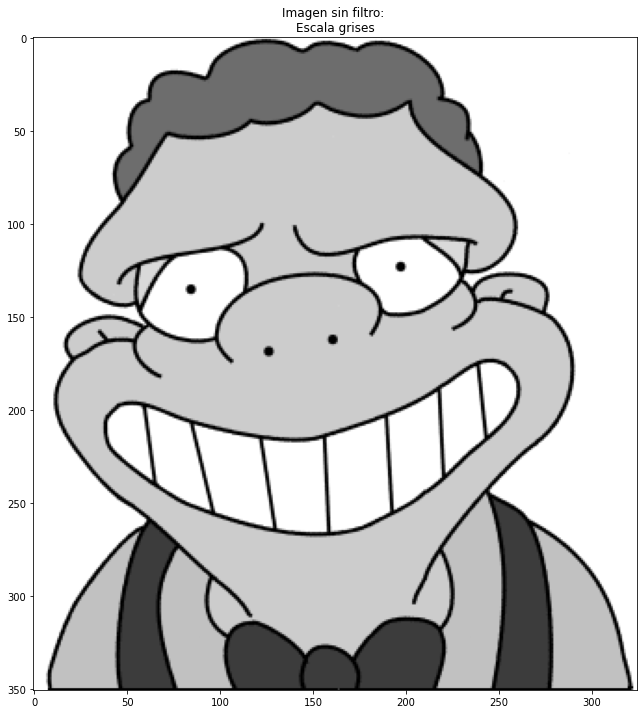

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

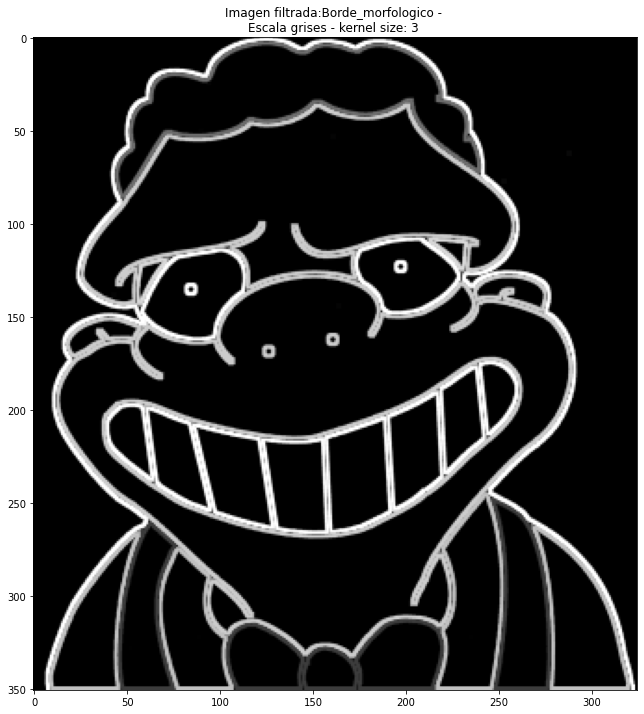

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

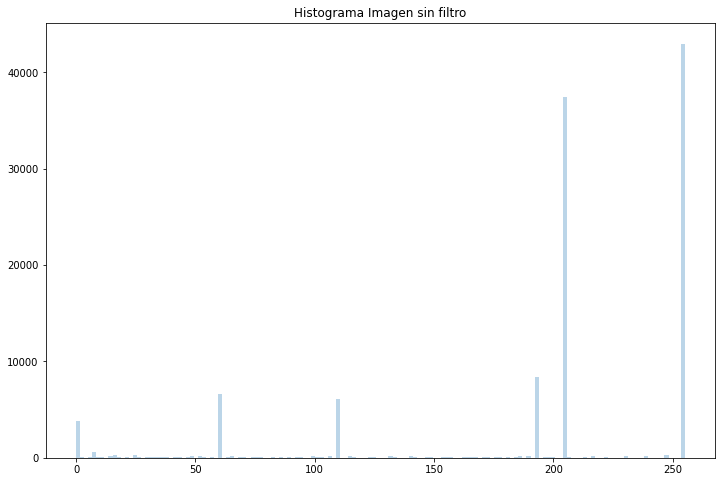

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

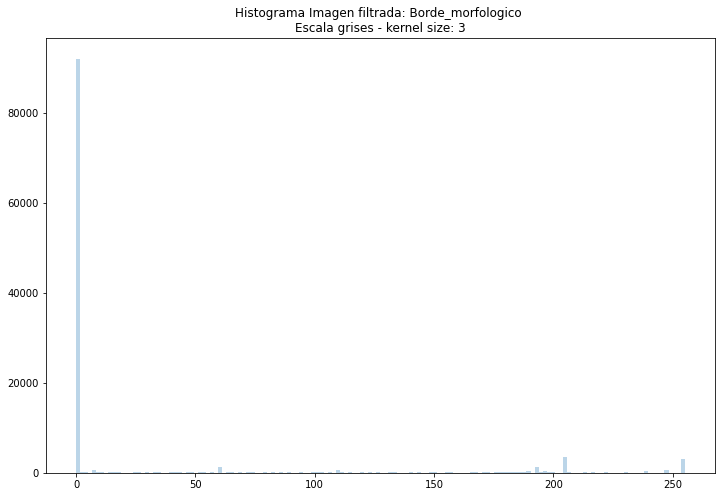

<IPython.core.display.Javascript object>

In [28]:

#@title Aplicar Filtro con grillas { run: "auto" }

#@markdown # Ingrese la url de la imagen que desea filtrar
img_url = 'https://tinyurl.com/yy7jf3zq' #@param ['imageio:astronaut.png','imageio:hubble_deep_field.png','imageio:wikkie.png','imageio:chelsea.png','https://tinyurl.com/yyr8et9y','https://tinyurl.com/yy7jf3zq']{allow-input: true}

#@markdown # Elige el tipo de filtro:
tipoFiltro = 'Borde_morfologico'  #@param['Erosion', 'Dilatacion', 'Apertura','Cierre','Borde_morfologico','Mediana','Top-hat'] 

#@markdown # Elige la dimensión del kernel:
ksize = 3  #@param[3, 5] {allow-input: true}

#@markdown # Elige el número de iteraciones:
iterations = 3  #@param[3, 5] {allow-input: true}


# Ejecutando a la funcion:
# antes, despues = load_Grayimg(img_url, tipoFiltro, int(ksize), int(px), orient)
antes, despues = load_Grayimg(img_url, tipoFiltro, int(ksize), int(iterations))

#creamos la grilla
grid = widgets.Grid(3, 2)

#ahora rellenamos las celdas
with grid.output_to(0, 0):
    print("Antes")
  
with grid.output_to(0, 1):
    print("Después")

with grid.output_to(1, 0):
    plt.figure(figsize=(12,12))
    plt.imshow(antes,'gray')
    plt.title(f'Imagen sin filtro: \nEscala grises')
  
with grid.output_to(1, 1):
    if tipoFiltro=='Sobel':
        texto = f'Imagen filtrada:{tipoFiltro} - \nEscala grises - kernel size: {ksize} - orientación: {orient} '
    else:
        texto = f'Imagen filtrada:{tipoFiltro} - \nEscala grises - kernel size: {ksize} '
    plt.figure(figsize=(12,12))
    plt.imshow(despues,'gray')
    plt.title(texto)

with grid.output_to(2, 0):
    plt.figure(figsize=(12,8))
    plt.hist(antes.ravel(), histtype='stepfilled',bins=150, alpha= 0.3,\
             label= 'Imagen Filtrada',range=(0, 255))
    plt.title(f'Histograma Imagen sin filtro')
  
with grid.output_to(2, 1):
    plt.figure(figsize=(12,8))
    plt.hist(despues.ravel(), histtype='stepfilled',bins=150, alpha= 0.3,\
             label= 'Imagen Filtrada',range=(0, 255))
    plt.title(f'Histograma Imagen filtrada: {tipoFiltro} \nEscala grises - kernel size: {ksize}')
    


## Se muestran los resultados para todos los filtros usados:

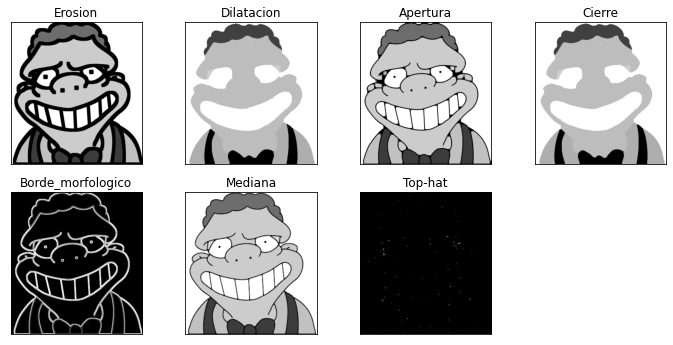

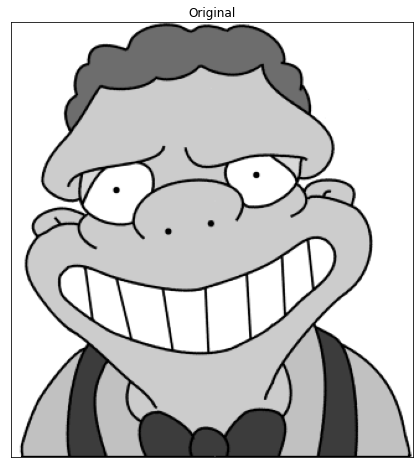

In [29]:

lista = ['Erosion', 'Dilatacion', 'Apertura','Cierre','Borde_morfologico','Mediana','Top-hat']

# Despues:
plt.figure (figsize=([12, 12]))
for i in range(len(lista)):
    # print(lista[i])
    img_url = 'https://tinyurl.com/yy7jf3zq'
    tipoFiltro = lista[i]
    
    antes, despues = load_Grayimg(img_url, tipoFiltro, int(3), int(3))
    # plt.subplot(4, 4, 8),plt.imshow(antes, "gray").potitle('original')
    plt.subplot(4, 4, i+1), plt.imshow(despues, "gray")
    plt.title(tipoFiltro)
    plt.xticks([]),plt.yticks([])

plt.show()

#  Antes de procesar: 'Original'
plt.figure (figsize=([8, 8]))
titles ='Original'
img_url = 'https://tinyurl.com/yy7jf3zq'
image = io.imread(img_url)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, "gray")
plt.title(titles)
plt.xticks([]),plt.yticks([])
plt.show()
